In [54]:
# https://github.com/joelgrus/data-science-from-scratch/blob/master/code/nearest_neighbors.py
%matplotlib inline
import matplotlib.pyplot as plt
from functools import partial
import random
from linear_algebra import distance

# Givent a function and a function_gradient, we can use this to calculate minimum and maximums

In [6]:
# Function to estimate
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

# as h gets smaller it gets closer to the derivative 
def differenece_quotient(f,x,h):
    return (f(x+h) - f(x))/h
    

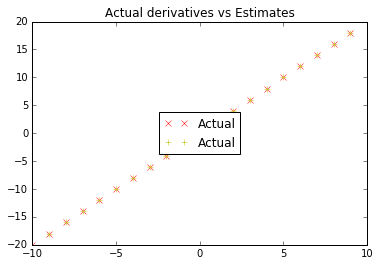

In [36]:
# Showing the similarities between derivative and difference_quotient

def square(x):
    return x*x

def derivative(x):
    return 2*x

derivative_estimate = partial(differenece_quotient, square, h=0.001)

x=range(-10,10)
plt.title("Actual derivatives vs Estimates")
plt.plot(x, map(derivative, x), 'rx', label='Actual')
plt.plot(x, map(derivative_estimate, x), 'y+', label='Actual')
plt.legend(loc=10)

In [37]:
# Partial dif quotient, is calculating the ith derivative and holding the other variables fixed.
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j == i else 0)
         for j, v_j in enumerate(v)]
         
    return (f(w) - f(v)) / h

def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h)
            for i, _ in enumerate(v)]



In [67]:
# Searching for the minimum

# makes a step in the given direction.
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v): 
    return [2 * v_i for v_i in v]

v = [random.randint(0,10) for i in range(3)]
# v = [4, 8, -1]
# gradient [8, 16, -2]

tolerance = 0.000001
next_v = None
while True:
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if (distance(next_v, v) < tolerance): # Next step was insignificant 
        break
    v = next_v
    
print next_v # very close to 0,0,0
        

[2.0482531616526785e-05, 1.536189871239509e-05, 4.096506323305357e-05]


In [66]:
# The same as before but with differencial_quotient

derivative_estimate = partial(estimate_gradient, sum_of_squares, h=0.00001)

v = [random.randint(0,10) for i in range(3)]
# v = [4, 8, -1]
# gradient [8, 16, -2]

tolerance = 0.000001
next_v = None
while True:
    gradient = derivative_estimate(v)
    next_v = step(v, gradient, -0.01)
    if (distance(next_v, v) < tolerance): # Next step was insignificant 
        break
    v = next_v
    
print next_v # very close to 0,0,0

[1.676235796659917e-05, 3.852468873186072e-05, -1.0440555487985969e-05]
